#   Malware classification on  UNSW_NB15 dataset 

<a id='2'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Import and Set up</b>

In [1]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 500) 
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis, 
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)
 
# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

/tmp/ipykernel_25/272811689.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
df = pd.read_csv('/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv')

In [3]:
cat = df['attack_cat'].unique()


In [4]:
cat

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [5]:
x = pd.read_csv('/kaggle/input/unswdata/unswdata.csv')
x.insert(0, 'id', range(1, len(x) + 1))


In [6]:
df=x

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4978 non-null   int64  
 1   dur               4978 non-null   float64
 2   proto             4978 non-null   object 
 3   service           0 non-null      float64
 4   state             0 non-null      float64
 5   spkts             4978 non-null   int64  
 6   dpkts             4978 non-null   int64  
 7   sbytes            4978 non-null   int64  
 8   dbytes            4978 non-null   int64  
 9   rate              4978 non-null   float64
 10  sttl              4978 non-null   int64  
 11  dttl              4978 non-null   int64  
 12  sloss             4978 non-null   int64  
 13  dloss             4978 non-null   int64  
 14  Sload             4978 non-null   float64
 15  Dload             4978 non-null   float64
 16  swin              4978 non-null   int64  


In [8]:
df.head(10)

id  dur proto  service  state  spkts  dpkts  sbytes  dbytes  rate  sttl  dttl  sloss  dloss       Sload       Dload  swin  dwin  stcpb  dtcpb  smeansz  dmeansz  trans_depth  res_bdy_len      Sjit      Djit       Stime       Ltime   Sintpkt   Dintpkt     tcprtt     synack     ackdat  is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login  ct_ftp_cmd  ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  attack_cat  label
0   1  0.0    IP      NaN    NaN      1      0      89       0   0.0   255   255      9      2  430.963813  615.184277   699   812   1751   1913      436      187            2         5502  5.320873  8.229613  1715743301  1715743301  6.055505  3.151845  59.412702  30.653833  39.666529                1             4                10             1           0          14          25          38          38                11                20              83         NaN      0
1   2  0.0    IP      NaN    NaN      1      0      68       0   0.0   128   128      8      1  506.563630  623.159150   318   253   1480   1213      361      460            1         7454  3.916820  8.954281  1715743301  1715743301  1.911479  9.421188  35.650607  38.683293  31.659746                0             3                 7             0           8           6          66          17          63                51                36               8         NaN      0
2   3  0.0    IP      NaN    NaN      1      0      40       0   0.0   121   121      8      7  281.798775  988.211126   125   814   1644   1261       72      153            3         9400  7.536974  7.667677  1715743301  1715743301  1.710194  0.327406  98.573208   8.955612  20.869901                0             4                 8             0           6          46          48          96          80                93                17              87         NaN      0
3   4  0.0    IP      NaN    NaN      1      0      64       0   0.0   121   121      7      1  743.854561  567.978093   507   355   1678   1117      180      500            1         8662  4.242960  2.672686  1715743301  1715743301  3.240144  3.817172  33.731157  41.855182  26.765133                1             3                 4             1           6          38          27          52          11                97                32               0         NaN      0
4   5  0.0    IP      NaN    NaN      1      0      40       0   0.0   128   128      8     10  787.705686  683.931492   292   197   1100   1302      130      483            1         5102  3.459686  6.445992  1715743301  1715743301  2.723320  3.749710  60.041537  12.252739   8.701085                1             5                 2             1          10          35          71          38          55                42                52               6         NaN      0
5   6  0.0    IP      NaN    NaN      1      0      64       0   0.0   128   128      0      9  741.789563  257.618236   131   983   1202   1410      490       88            5         6157  6.492710  7.153720  1715743301  1715743301  5.861654  5.009363  36.588084   3.833826  37.807189                0             2                 4             1           0          41          27          54          59                 4                52              13         NaN      0
6   7  0.0    IP      NaN    NaN      1      0     345       0   0.0    64    64      8      3  967.037614  533.755846   455   209   1507   1831      376      134            1         3451  0.337081  2.578852  1715743301  1715743301  4.188025  2.999542  38.575640  10.000975   0.606454                0             1                10             0           0           6          79          80          98                77                60              16         NaN      0
7   8  0.0    IP      NaN    NaN      1      0      52       0   0.0   128   128      3      2  631.205384  746.095034   541   348   1264   1001      456      240 

In [9]:
df.describe(include='all')

id          dur proto  service  state   spkts   dpkts       sbytes  dbytes    rate         sttl         dttl        sloss        dloss        Sload        Dload         swin         dwin        stcpb        dtcpb      smeansz      dmeansz  trans_depth  res_bdy_len         Sjit         Djit         Stime         Ltime      Sintpkt      Dintpkt       tcprtt       synack       ackdat  is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login   ct_ftp_cmd   ct_srv_src   ct_srv_dst   ct_dst_ltm   ct_src_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  attack_cat   label
count   4978.00000  4978.000000  4978      0.0    0.0  4978.0  4978.0  4978.000000  4978.0  4978.0  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4.978000e+03  4.978000e+03  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000      4978.000000   4978.000000       4978.000000   4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000       4978.000000       4978.000000     4978.000000         0.0  4978.0
unique         NaN          NaN     1      NaN    NaN     NaN     NaN          NaN     NaN     NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN           NaN           NaN          NaN          NaN          NaN          NaN          NaN              NaN           NaN               NaN           NaN          NaN          NaN          NaN          NaN          NaN               NaN               NaN             NaN         NaN     NaN
top            NaN          NaN    IP      NaN    NaN     NaN     NaN          NaN     NaN     NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN           NaN           NaN          NaN          NaN          NaN          NaN          NaN              NaN           NaN               NaN           NaN          NaN          NaN          NaN          NaN          NaN               NaN               NaN             NaN         NaN     NaN
freq           NaN          NaN  4978      NaN    NaN     NaN     NaN          NaN     NaN     NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN          NaN           NaN           NaN          NaN          NaN          NaN          NaN          NaN              NaN           NaN               NaN           NaN          NaN          NaN          NaN          NaN          NaN               NaN               NaN             NaN         NaN     NaN
mean    2489.50000     0.000032   NaN      NaN    NaN     1.0     0.0   590.767376     0.0     0.0   108.969064   108.969064     4.996786     4.938730   545.246142   550.613211   553.200683   550.178787  1503.642226  1500.347127   278.271997   274.261551     2.497589  5056.596022     4.991555     5.060161  1.715743e+09  1.715743e+09     5.052995     4.997167    49.912607    25.249256    25.193950         0.489152      2.521495          5.093009      0.508437     4.941744    50.036360    49.941342    50.250301    50.187626         50.257935         50.079148       49.710125         NaN     0.0
std     1437.16915     0.000566   NaN      NaN    NaN     0.0     0.0   772.697920     0.0     0.0    45.702705    45.702705     3.167292     3.141826   261.068877   258.111553   259.317565   257.981789   290.272514   291.096377   130.532765   129.507153     1.713476  2852.570529     2.880028     2.877732  0.000000e+00  0.000000e+00     2.889961     2.872013    28.780846    14.514426    14.478487         0.499933

<a id='3'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Pre-processing and Feature Selection</b>

The data quality report was generated for Post Block Assignment 1. This section will process and select the features in accordance with the recommendations of that report. 

## Drop irrelevant or excess feastures

The first feature to drop is 'id'. This feature is an index and not descriptive. 

The second feature to drop is 'attack_cat'. This feature is an extension of the target feature, therefore using it will give us 100% predictions but will not give us a generalizable model. 

The other features to be dropped are those that were too strongly correlated. In this current version none of them were dropped, as the model is first evaluated to see how well it can perform.

In [10]:
list_drop = ['id','attack_cat']

In [11]:
df.drop(list_drop,axis=1,inplace=True)

## Apply Clamping

The extreme values should be pruned to reduce the skewness of some distributions. The logic applied here is that the features with a maximum value more than ten times the median value is pruned to the 95th percentile. If the 95th percentile is close to the maximum, then the tail has more interesting information than what we want to discard. 

The clamping is also only applied to features with a maximum of more than 10 times the median. This prevents the bimodals and small value distributions from being excessively pruned.  

In [12]:
# Clamp extreme Values
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

dur  service  state   spkts   dpkts       sbytes  dbytes    rate         sttl         dttl        sloss        dloss        Sload        Dload         swin         dwin        stcpb        dtcpb      smeansz      dmeansz  trans_depth  res_bdy_len         Sjit         Djit         Stime         Ltime      Sintpkt      Dintpkt       tcprtt       synack       ackdat  is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login   ct_ftp_cmd   ct_srv_src   ct_srv_dst   ct_dst_ltm   ct_src_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm   label
count  4978.000000      0.0    0.0  4978.0  4978.0  4978.000000  4978.0  4978.0  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4.978000e+03  4.978000e+03  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000      4978.000000   4978.000000       4978.000000   4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000       4978.000000       4978.000000     4978.000000  4978.0
mean      0.000032      NaN    NaN     1.0     0.0   590.767376     0.0     0.0   108.969064   108.969064     4.996786     4.938730   545.246142   550.613211   553.200683   550.178787  1503.642226  1500.347127   278.271997   274.261551     2.497589  5056.596022     4.991555     5.060161  1.715743e+09  1.715743e+09     5.052995     4.997167    49.912607    25.249256    25.193950         0.489152      2.521495          5.093009      0.508437     4.941744    50.036360    49.941342    50.250301    50.187626         50.257935         50.079148       49.710125     0.0
std       0.000566      NaN    NaN     0.0     0.0   772.697920     0.0     0.0    45.702705    45.702705     3.167292     3.141826   261.068877   258.111553   259.317565   257.981789   290.272514   291.096377   130.532765   129.507153     1.713476  2852.570529     2.880028     2.877732  0.000000e+00  0.000000e+00     2.889961     2.872013    28.780846    14.514426    14.478487         0.499933      1.700512          3.148011      0.499979     3.142618    28.959875    28.760737    29.272459    29.029555         29.449237         29.079740       29.260509     0.0
min       0.000000      NaN    NaN     1.0     0.0    28.000000     0.0     0.0     1.000000     1.000000     0.000000     0.000000   100.452756   100.735773   100.000000   100.000000  1000.000000  1000.000000    50.000000    50.000000     0.000000   101.000000     0.008848     0.002100  1.715743e+09  1.715743e+09     0.002042     0.002343     0.045558     0.011058     0.016318         0.000000      0.000000          0.000000      0.000000     0.000000     0.000000     0.000000     0.000000     0.000000          0.000000          0.000000        0.000000     0.0
25%       0.000000      NaN    NaN     1.0     0.0    52.000000     0.0     0.0    58.000000    58.000000     2.000000     2.000000   318.205561   327.435427   329.250000   328.000000  1251.000000  1246.000000   166.000000   164.000000     1.000000  2593.500000     2.494786     2.559665  1.715743e+09  1.715743e+09     2.559828     2.515036    24.448001    12.808479    12.486595         0.000000      1.000000          2.000000      0.000000     2.000000    25.000000    25.000000    25.000000    25.000000         25.000000         25.000000       24.000000     0.0
50%       0.000000      NaN    NaN     1.0     0.0    80.000000     0.0     0.0   128.000000   128.000000     5.000000     5.000000   546.283737   550.575113   554.000000   548.000000  1504.000000  1503.000000   280.000000   273.000000     2.000000  5066.500000     4.967329     5.063035  1.715743e+09  1.715743e+09     5.089872     4.954343    50.486134    25.471320    25.433758         0.000000      3.000000          5.000000      1.000000     5.000000    50.000000    50.000000    51.000000    50.000000         51.000000         51.000000       50.000000     0.0
75%       0.000000      NaN    N

In [13]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

In [14]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

dur  service  state   spkts   dpkts       sbytes  dbytes    rate         sttl         dttl        sloss        dloss        Sload        Dload         swin         dwin        stcpb        dtcpb      smeansz      dmeansz  trans_depth  res_bdy_len         Sjit         Djit         Stime         Ltime      Sintpkt      Dintpkt       tcprtt       synack       ackdat  is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login   ct_ftp_cmd   ct_srv_src   ct_srv_dst   ct_dst_ltm   ct_src_ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm   label
count  4978.000000      0.0    0.0  4978.0  4978.0  4978.000000  4978.0  4978.0  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4.978000e+03  4.978000e+03  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000      4978.000000   4978.000000       4978.000000   4978.000000  4978.000000  4978.000000  4978.000000  4978.000000  4978.000000       4978.000000       4978.000000     4978.000000  4978.0
mean      0.000032      NaN    NaN     1.0     0.0   534.246685     0.0     0.0   108.969064   108.969064     4.996786     4.938730   545.246142   550.613211   553.200683   550.178787  1503.642226  1500.347127   278.271997   274.261551     2.497589  5056.596022     4.991555     5.060161  1.715743e+09  1.715743e+09     5.052995     4.997167    49.912607    25.249256    25.193950         0.489152      2.521495          5.093009      0.508437     4.941744    50.036360    49.941342    50.250301    50.187626         50.257935         50.079148       49.710125     0.0
std       0.000566      NaN    NaN     0.0     0.0   611.602401     0.0     0.0    45.702705    45.702705     3.167292     3.141826   261.068877   258.111553   259.317565   257.981789   290.272514   291.096377   130.532765   129.507153     1.713476  2852.570529     2.880028     2.877732  0.000000e+00  0.000000e+00     2.889961     2.872013    28.780846    14.514426    14.478487         0.499933      1.700512          3.148011      0.499979     3.142618    28.959875    28.760737    29.272459    29.029555         29.449237         29.079740       29.260509     0.0
min       0.000000      NaN    NaN     1.0     0.0    28.000000     0.0     0.0     1.000000     1.000000     0.000000     0.000000   100.452756   100.735773   100.000000   100.000000  1000.000000  1000.000000    50.000000    50.000000     0.000000   101.000000     0.008848     0.002100  1.715743e+09  1.715743e+09     0.002042     0.002343     0.045558     0.011058     0.016318         0.000000      0.000000          0.000000      0.000000     0.000000     0.000000     0.000000     0.000000     0.000000          0.000000          0.000000        0.000000     0.0
25%       0.000000      NaN    NaN     1.0     0.0    52.000000     0.0     0.0    58.000000    58.000000     2.000000     2.000000   318.205561   327.435427   329.250000   328.000000  1251.000000  1246.000000   166.000000   164.000000     1.000000  2593.500000     2.494786     2.559665  1.715743e+09  1.715743e+09     2.559828     2.515036    24.448001    12.808479    12.486595         0.000000      1.000000          2.000000      0.000000     2.000000    25.000000    25.000000    25.000000    25.000000         25.000000         25.000000       24.000000     0.0
50%       0.000000      NaN    NaN     1.0     0.0    80.000000     0.0     0.0   128.000000   128.000000     5.000000     5.000000   546.283737   550.575113   554.000000   548.000000  1504.000000  1503.000000   280.000000   273.000000     2.000000  5066.500000     4.967329     5.063035  1.715743e+09  1.715743e+09     5.089872     4.954343    50.486134    25.471320    25.433758         0.000000      3.000000          5.000000      1.000000     5.000000    50.000000    50.000000    51.000000    50.000000         51.000000         51.000000       50.000000     0.0
75%       0.000000      NaN    N

## Apply log function to nearly all numeric, since they are all mostly skewed to the right

It would have been too much of a slog to apply the log function individually, therefore a simple rule has been set up: if the number of unique values in the continuous feature is more than 50 then apply the log function. The reason more than 50 unique values are sought is to filter out the integer based features that act more categorically.  

In [15]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])

## Reduce the labels in catagorical features

Some features have very high cardinalities, and this section reduces the cardinality to 5 or 6 per feature. The logic is to take the top 5 occuring labels in the feature as the labels and set the remainder to '-' (seldom used) labels. When the encoding is done later on, the dimensionality will not explode and cause the curse of dimensionality. 

In [16]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

proto
count   4978
unique     1
top       IP
freq    4978

In [17]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')
    
    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

In [18]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

proto
count   4978
unique     1
top       IP
freq    4978

In [19]:
df['proto'].value_counts().head().index

Index(['IP'], dtype='object', name='proto')

In [20]:
df['proto'].value_counts().index

Index(['IP'], dtype='object', name='proto')

## View before and after of features

This section simply displays the distributions within features before and after the transformations.  

## Best Features

This section does an analysis (univariate statistical tests) to determine which features best predict the target feature. 

## Encode categorical features

The categorical features must be encoded to ensure that the models can interpret them. One-hot encoding is used since none of the categorical features are ordinal.  

In [21]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [22]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(4978, 44)

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [24]:
np.shape(X)

(4978, 44)

In [25]:
df_cat.describe(include='all')

proto
count   4978
unique     1
top       IP
freq    4978

In [26]:
X[0]

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 4.48863637e+00, 0.00000000e+00,
       0.00000000e+00, 2.55000000e+02, 2.55000000e+02, 9.00000000e+00,
       2.00000000e+00, 6.06602413e+00, 6.42192186e+00, 6.54965074e+00,
       6.69950034e+00, 7.46794233e+00, 7.55642797e+00, 6.07764224e+00,
       5.23110862e+00, 2.00000000e+00, 8.61286694e+00, 1.67163731e+00,
       2.10773904e+00, 1.71574330e+09, 1.71574330e+09, 1.80096779e+00,
       1.14798813e+00, 4.08450804e+00, 3.42275772e+00, 3.68050772e+00,
       1.00000000e+00, 4.00000000e+00, 1.00000000e+01, 1.00000000e+00,
       0.00000000e+00, 2.70805020e+00, 3.25809654e+00, 3.66356165e+00,
       3.66356165e+00, 2.48490665e+00, 3.04452244e+00, 4.43081680e+00])

In [27]:
len(feature_names)

44

In [28]:
# len(feature_names)

<a id='4'></a>
# <p style="padding: 8px;color:white; display:fill;background-color:#555555; border-radius:5px; font-size:100%"> <b>Modelling and Evaluation</b>

## Prep for Modelling

### Split test and training
In this section the data is split into test and training sets using stratified sampling. 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y)

### Standardize continuous features
a standard scaler is used on the continuous features to put them all in the same order of size.

In [30]:
df_cat.describe(include='all')

proto
count   4978
unique     1
top       IP
freq    4978

In [31]:
# 6 + 5 + 6 unique = 17, therefore the first 17 rows will be the categories that have been encoded, start scaling from row 18 only.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 18:] = sc.fit_transform(X_train[:, 18:])
X_test[:, 18:] = sc.transform(X_test[:, 18:])

<a id='4_5'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#aaaaaa; border-radius:5px; font-size:100%"> <b>Random Forest</b>

In [32]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [33]:
from joblib import load

model = load('/kaggle/input/unswmodel/random_forest_model.joblib')


In [34]:
X_test

array([[ 1.        ,  1.        ,  1.        , ...,  0.79661554,
         0.91469544,  0.85265724],
       [ 1.        ,  1.        ,  1.        , ...,  0.32523134,
        -1.69689692,  1.02803235],
       [ 1.        ,  1.        ,  1.        , ...,  0.19483403,
         0.7435269 , -2.15884869],
       ...,
       [ 1.        ,  1.        ,  1.        , ..., -3.87723032,
         0.60689745,  0.3407667 ],
       [ 1.        ,  1.        ,  1.        , ...,  0.38488694,
        -0.06646131,  0.85265724],
       [ 1.        ,  1.        ,  1.        , ...,  0.30457866,
        -0.50598972, -1.79970227]])

In [35]:
import numpy as np

num_extra_features = 12  
extra_features = np.random.rand(X_test.shape[0], num_extra_features)

X_test_extended = np.concatenate((X_test, extra_features), axis=1)

y_predictions = model.predict(X_test_extended)


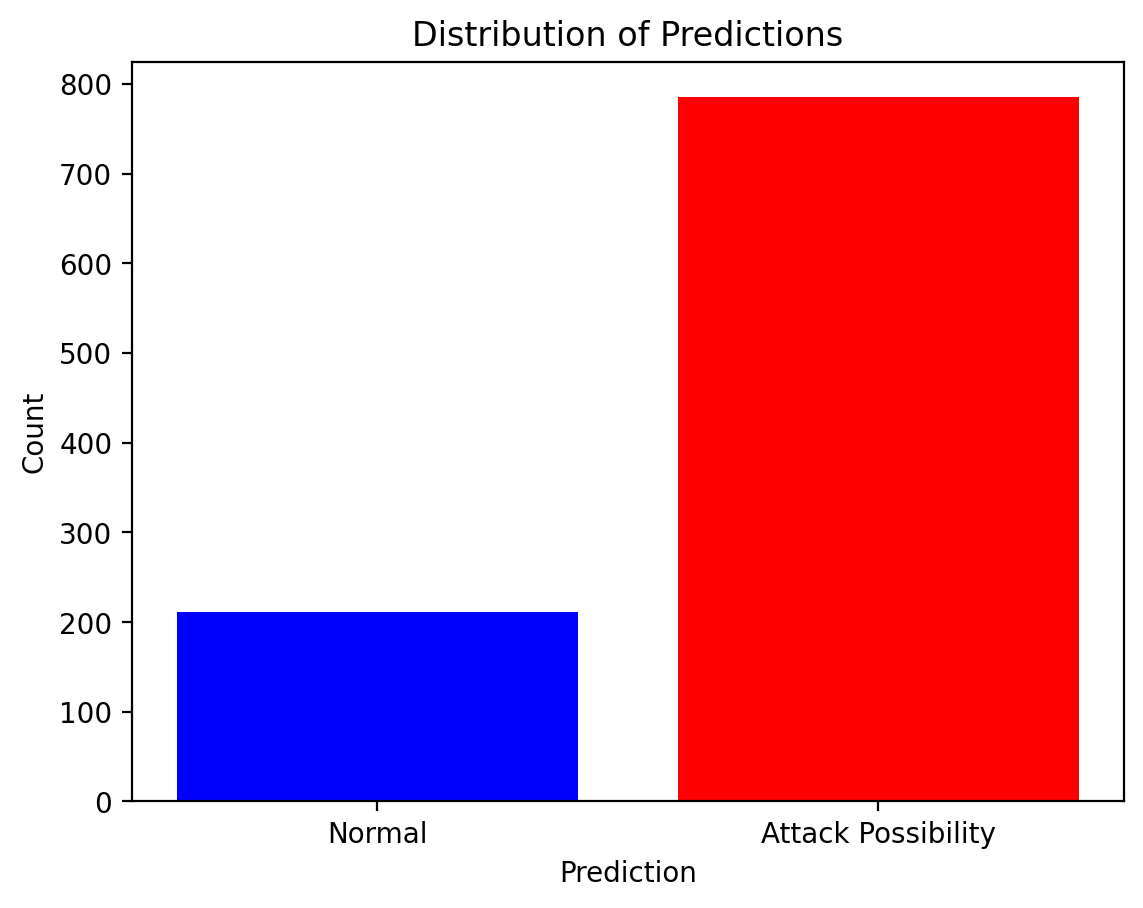

In [36]:
import matplotlib.pyplot as plt

prediction_counts = {'Normal': 0, 'Attack Possibility': 0}
for prediction in y_predictions:
    if prediction == 0:
        prediction_counts['Normal'] += 1
    else:
        prediction_counts['Attack Possibility'] += 1
        
plt.bar(prediction_counts.keys(), prediction_counts.values(), color=['blue', 'red'])
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Distribution of Predictions')
plt.show()

# 

# 